BRUNO DA SILVA 396433 - CK0223

# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


In [1]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np


#função para carregar o arquivo CSV
def load_csv(filename):
    dataset = pd.read_csv(filename, header=None)
    return np.array(dataset)
           
def mean(values):
    return sum(values) / float(len(values))

def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

#Calcular covariância entre x e y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

#função para calcular RMSE
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

#função para avaliar algoritmo
def evaluate_algorithm(ds_train, ds_test, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
        predicted = algorithm(dataset, test_set)
        print(predicted)
        actual = [row[-1] for row in dataset]
        rmse = rmse_metric(actual, predicted)
    return rmse

def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        ypred = b0 + b1 * row[0]
        predictions.append(ypred)
    return predictions   

In [2]:
filename = 'insurance.csv'
dataset = load_csv(filename)
ds_train, ds_test = train_test_split(dataset, test_size = 0.4)
simple_linear_regression(ds_train, ds_test)

[179.12656889495224,
 234.40309859643443,
 61.6639432793026,
 51.29959396027469,
 34.025678428561505,
 68.57350949198788,
 68.57350949198788,
 23.661329109533597,
 220.5839661710639,
 65.11872638564523,
 47.84481085393205,
 44.390027747589414,
 110.03090676809951,
 165.30743646958172,
 113.48568987444216,
 213.67439995837861,
 68.57350949198788,
 130.75960540615534,
 61.6639432793026,
 151.48830404421116,
 206.76483374569335,
 161.85265336323909,
 34.025678428561505,
 51.29959396027469,
 230.9483154900918,
 106.57612366175688]

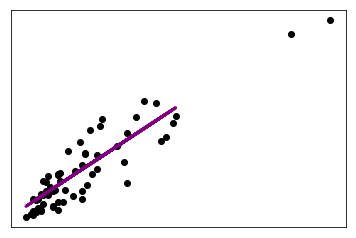

In [3]:
plt.scatter(dataset[:,0], dataset[:,1],  color='black')
plt.plot(ds_test[:,0], simple_linear_regression(ds_train, ds_test), color='purple', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()